#### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# <center><font color=7E4456>Widhya</font></center>

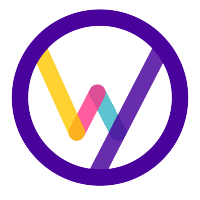

#### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
### <center><font color=7E4456>Data Science Internship

### <center><font color=7E4456>By </font><font color=15D77D>: </font><font color=5B1736>Shreeya Ravindra Pant-Paradkar</font></center>
#### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# <center><font color=5B4727>Applied DSA</font></center>
### <center><font color=5B4727>(Level - Intermediate)</font></center>
# <center><font color=14655D>Mission 2 : Uber Shortest Path Computation</font></center>
### <center><font color=155E64>Problem Statement: </font><font color=5B4727>Identify the distance and the path between two points</font>
#### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

###### Date: 14-01-21 (Thursday)

#### Importing Libraries

#### Eculidean Distance

In [1]:
def eculidean():
    x1 = float(input("Enter 'x1' value: "))
    x2 = float(input("Enter 'x2' value: "))
    y1 = float(input("Enter 'y1' value: "))
    y2 = float(input("Enter 'y2' value: "))
    x = (x2-x1)**2
    y = (y2-y1)**2
    D=(x+y)**0.5
    print('\nEculidean Distance is: {}'.format(round(D,2)))

In [2]:
eculidean()

Enter 'x1' value: 45
Enter 'x2' value: 12
Enter 'y1' value: 35
Enter 'y2' value: 15

Eculidean Distance is: 38.59


#### Manhattan Distance

> Sum of Manhattan distance between all pairs of co-ordinates

In [3]:
#return the sum of distance of one axis
def distance_sum (arr, n): 
      
    #sorting the array
    arr.sort() 
      
    #for each point, finding the distance. 
    res = 0
    sum = 0
    
    for i in range(n): 
        res += (arr[i] * i - sum) 
        sum += arr[i] 
      
    return res 

In [4]:
def total_distance_sum( x , y , n ): 
    total = distance_sum(x, n) + distance_sum(y, n)
    return total

In [5]:
x = [ 8, 5, -3, 4 ] 
y = [ 4, 5, 2, 1 ]
n = len(x)  

In [6]:
total_distance_sum(x, y, n)

48

#### Bellman Ford Algorithm

In [7]:
from collections import defaultdict

In [8]:
from collections import defaultdict

class Graph:
    def __init__(self,vertices):
        self.V = vertices 
        self.graph = []
        
    #add edge to graph
    def addEdge(self, u,v,w):
        self.graph.append([u,v,w])
        
    #print solution
    def printArr(self,dist):
        print("Vertex Distance from Source ")
        for i in range(self.V):
            print("%d -> %d" % (i,dist[i]))
            
    #main function for bellman ford algorithm, also detects negative weight cycles
    def BellmanFord(self,src):
        
        #init all distances from source to all as INFINITE
        dist = [float("Inf")] * self.V
        dist[src] = 0
        
        #relax all edges |V|-1 times.
        for i in range(self.V - 1):
            
            #update dist value and parent index of adjacent values of selected vertex
            #consider those which are still in queue
            for u, v, w in self.graph:
                if dist[u] != float("Inf") and dist[u] + w < dist[v]:
                    dist[v] = dist[u] + w
                    
        #check for negative weight cycles. If path obtained from above step (shortest distances) is shorter, there's a cycle. 
        #so quit.
        for u, v, w in self.graph:
            if dist[u] != float("Inf") and dist[u] + w < dist[v]:
                print("Negative Cycles !")
                return
            
        #print distances
        self.printArr(dist)

In [9]:
g = Graph(5)

In [10]:
g.addEdge(0, 1, -1)
g.addEdge(0, 2, 4)
g.addEdge(1, 2, 3)
g.addEdge(1, 3, 2)
g.addEdge(1, 4, 2)
g.addEdge(3, 2, 5)
g.addEdge(3, 1, 1)
g.addEdge(4, 3, -3)

In [11]:
#Print the solution
g.BellmanFord(0)

Vertex Distance from Source 
0 -> 0
1 -> -1
2 -> 2
3 -> -2
4 -> 1


#### Dijkstra Short Distance

In [12]:
import sys

In [13]:
class Vertex:
    
    def __init__(self, node):
        self.id = node
        self.adjacent = {}
        
        #set distance to infinity for all nodes
        self.distance = sys.maxint
        
        #mark all nodes unvisited        
        self.visited = False  
        
        #predecessor
        self.previous = None

    def add_neighbor(self, neighbor, weight=0):
        self.adjacent[neighbor] = weight

    def get_connections(self):
        return self.adjacent.keys()  

    def get_id(self):
        return self.id

    def get_weight(self, neighbor):
        return self.adjacent[neighbor]

    def set_distance(self, dist):
        self.distance = dist

    def get_distance(self):
        return self.distance

    def set_previous(self, prev):
        self.previous = prev

    def set_visited(self):
        self.visited = True

    def __str__(self):
        return str(self.id) + ' adjacent: ' + str([x.id for x in self.adjacent])

In [14]:
class Graph:
    
    def __init__(self):
        self.vert_dict = {}
        self.num_vertices = 0

    def __iter__(self):
        return iter(self.vert_dict.values())

    def add_vertex(self, node):
        self.num_vertices = self.num_vertices + 1
        new_vertex = Vertex(node)
        self.vert_dict[node] = new_vertex
        return new_vertex

    def get_vertex(self, n):
        if n in self.vert_dict:
            return self.vert_dict[n]
        else:
            return None

    def add_edge(self, frm, to, cost = 0):
        if frm not in self.vert_dict:
            self.add_vertex(frm)
        if to not in self.vert_dict:
            self.add_vertex(to)

        self.vert_dict[frm].add_neighbor(self.vert_dict[to], cost)
        self.vert_dict[to].add_neighbor(self.vert_dict[frm], cost)

    def get_vertices(self):
        return self.vert_dict.keys()

    def set_previous(self, current):
        self.previous = current

    def get_previous(self, current):
        return self.previous

In [15]:
def shortest(v, path):
    ''' make shortest path from v.previous'''
    if v.previous:
        path.append(v.previous.get_id())
        shortest(v.previous, path)
    return

In [16]:
import heapq

In [17]:
def dijkstra(aGraph, start, target):
    print('''Dijkstra's shortest path''')
    #set the distance for the start node to zero 
    start.set_distance(0)

    #put tuple pair into the priority queue
    unvisited_queue = [(v.get_distance(),v) for v in aGraph]
    heapq.heapify(unvisited_queue)

    while len(unvisited_queue):
        #pops a vertex with the smallest distance 
        uv = heapq.heappop(unvisited_queue)
        current = uv[1]
        current.set_visited()

        #for next in v.adjacent:
        for next in current.adjacent:
            #if visited, skip
            if next.visited:
                continue
            new_dist = current.get_distance() + current.get_weight(next)
            
            if new_dist < next.get_distance():
                next.set_distance(new_dist)
                next.set_previous(current)
                print('updated : current = %s next = %s new_dist = %s' \
                        %(current.get_id(), next.get_id(), next.get_distance()))
            else:
                print('not updated : current = %s next = %s new_dist = %s' \
                        %(current.get_id(), next.get_id(), next.get_distance()))

        #rebuild heap
        # 1. Pop every item
        while len(unvisited_queue):
            heapq.heappop(unvisited_queue)
        # 2. Put all vertices not visited into the queue
        unvisited_queue = [(v.get_distance(),v) for v in aGraph if not v.visited]
        heapq.heapify(unvisited_queue)

#### Conclusion
##### I have successfully identified the distance and the path between two points

#### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# <center><font color=5B1736>Thank You!</font></center>